In [1]:
%load_ext autoreload
%autoreload 2
import pickle


In [2]:
from main import tools, ode, optimize, net, get_data, model
import gpytorch

/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
with open('hrrr/datas/datas_fit.pkl', 'rb') as f:
    datas = pickle.load(f)

In [4]:
len(datas)

8

In [5]:
indices = datas[4].indices[:500]

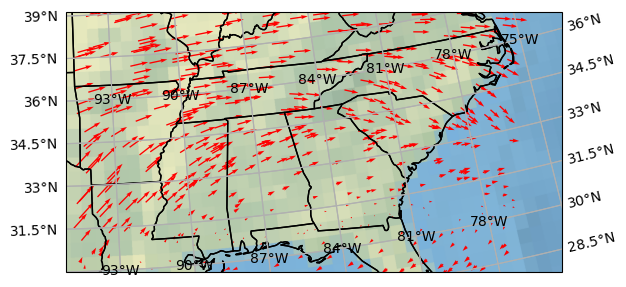

In [ ]:
f = datas[6].plot_vel(indices, color = "red")

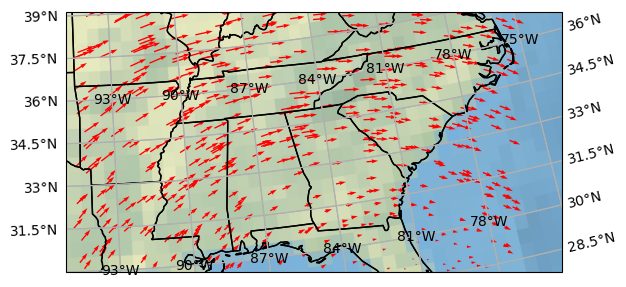

In [12]:
f = datas[4].plot_vel_data(indices, color = "red")

In [64]:
datas[0].indices.shape[0]

2400